## Ab initio Hartree-Fock calculation on H2


##  Functions 

### Wave Function
The antisymmetric wave function can be written as a single Slater determinant:
\begin{equation}
\Psi(x_1,\dots,x_N)=\frac{1}{\sqrt{N!}}
\det\big[\chi_i(x_j)\big]
\end{equation}
$\big[\chi_i(x_j)\big]$: spin orbital

### Molecular Orbital and Basis function
Considere a two-electron case in which we occupy the molecular orbitals:
$\psi_1(\mathbf{1}$) and $\psi_2(\mathbf{2}$)

After eliminating spin, we can expand the unknow molecular orbitals in the linear expansions of basis functions:
\begin{equation}
\psi_i=\sum_{v=1}^{K=2} C_{vi}\phi_v
\end{equation}


For electronic wave function calculations one would prefer to use the Slater-functions. The normalized 1s Slater-type function, has the form: 
\begin{equation}
\phi_v=\phi_{1s}^{\mathrm{SF}}(\zeta,\mathbf{r}-\mathbf{R}_i)=\left(\frac{\zeta^3}{\pi}\right)^{1/2}
e^{-\zeta |\mathbf{r}-\mathbf{R}_i|}
\end{equation}



The integrals are relatively easy to evaluate with contraction of Gaussian basis functions:
Our basis set is the standard STO-3G basis set, consisting of two functions where each of these functions is a contraction of three primitive Gaussians such that each constitutes a least-squares fit to a Slater function: 

\begin{equation}
\phi_v=\phi_{1s}^{\mathrm{CGF}}(\zeta=1.24,STO-3G)
= 0.4446345422 \phi_{1s}^{\mathrm{GF}}(0.1688554040)+0.5353281423 \phi_{1s}^{\mathrm{GF}}(0.6239137298)+
0.1543289673 \phi_{1s}^{\mathrm{GF}}(3.425250914)

\end{equation}


we have minimal basis set, so we have just two basis functions where each of these functions is a contraction of gaussian functions:






	
\begin{equation}
\phi_\nu^{\mathrm{CGF}}(\mathbf r-\mathbf R_A)
=
\sum_{q=1}^{3}
d_{q\nu}\,
\phi_q^{\mathrm{GF}}(\alpha_{q\nu},\mathbf r-\mathbf R_A)

\end{equation}

\begin{equation}	
\phi_\mu^{\mathrm{CGF}}(\mathbf r-\mathbf R_B)
=
\sum_{p=1}^{3}
d_{p\mu}\,
\phi_p^{\mathrm{GF}}(\beta_{p\mu},\mathbf r-\mathbf R_B)


\end{equation}

\begin{equation}
\phi_{\nu}^{\mathrm{GF}}(\alpha,\mathbf{r}-\mathbf{R}_i)
=
\left(\frac{2\alpha}{\pi}\right)^{3/4}
e^{-\alpha |\mathbf{r}-\mathbf{R}_i|^2}
\end{equation}



## Overlap Integrals
First, Let's Calculate Single Electron Integrals:

\begin{equation}
S_{\mu\nu}=
\sum_{p=1}^{3}\sum_{q=1}^{3}
d_{p\mu}\,\,d_{q\nu}\int d\mathbf r_1
\phi_p^{\mathrm{GF*}}(\beta_{p\mu},\mathbf r_1-\mathbf R_B)\,
\phi_q^{\mathrm{GF}}(\alpha_{q\nu},\mathbf r_1-\mathbf R_A)
\end{equation}




\begin{equation}	
S_{\mu\nu}=\int d\mathbf r_1\,\phi_\mu^*(1)\,\phi_\nu(1)
\end{equation}

\begin{equation}
S_{\nu\mu}=\int d\mathbf r_1\,\phi_\nu^*(1)\,\phi_\mu(1)
\end{equation}

\begin{equation}	
S_{\mu\mu}=\int d\mathbf r_1\,\phi_\mu^*(1)\,\phi_\mu(1)
\end{equation}

\begin{equation}
S_{\nu\nu}=\int d\mathbf r_1\,\phi_\nu^*(1)\,\phi_\nu(1)
\end{equation}

S=[[$S_{\nu\nu}$,$S_{\mu\nu}$],[$S_{\nu\mu}$,$S_{\mu\mu}$]]


### The product of two Gaussian function on different center is another Gaussian on a third center.
	
		This property does not hold for Slater functions.
		It is the main reason Gaussians are used in practice.

\begin{equation}
	\phi_{1s}^{\mathrm{GF}}(\alpha,\mathbf{r_1}-\mathbf{R}_A)
	\phi_{1s}^{\mathrm{GF}}(\beta,\mathbf{r_1}-\mathbf{R}_B)
	=
	K_{AB}\,
	\phi_{1s}^{\mathrm{GF}}(p,\mathbf{r_1}-\mathbf{R}_P)
\end{equation}


\begin{equation}

\end{equation}

Exponent of the new Gaussian:
\begin{equation}
p = \alpha + \beta
\end{equation}

Position of the new centre:
\begin{equation}
		\mathbf{R}_P =
		\frac{\alpha \mathbf{R}_A + \beta \mathbf{R}_B}{\alpha + \beta}
\end{equation}




so:

\begin{equation}
\int d\mathbf r_1
\phi_p^{\mathrm{GF*}}(\beta_{p\mu},\mathbf r_1-\mathbf R_B)\,
\phi_q^{\mathrm{GF}}(\alpha_{q\nu},\mathbf r_1-\mathbf R_A)=		\left( \frac{2\alpha}{\pi} \right)^{3/4}\left( \frac{2\beta}{\pi} \right)^{3/4}
		\exp\!\left[
		-\frac{\alpha\beta}{\alpha+\beta}|\mathbf{R}_A-\mathbf{R}_B|^2
		\right]\,\left( \frac{\pi}{(\alpha+\beta)} \right)^{3/2}
\end{equation}









In [35]:
# ======================
# internuclear distance (bohr)
# ======================
r=1.4

# ======================
# STO-3G BASIS FOR H
# ======================
# each H has two contracted s orbitals
d=[0.1543289673,0.5353281423,0.4446345422]
ex=[3.425250914,0.6239137298,0.1688554040]


In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm




# =====================================================
# NORMALIZED PRIMITIVE GAUSSIAN OVERLAP (Szabo A.9)
# =====================================================

overlap = lambda a,b,dr : ((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))*math.exp(-a*b/(a+b)*dr**2)*((3.1415926/(a+b))**1.5)


# ===============================
# OVERLAP MATRIX
# ===============================

S = np.zeros((2,2))


n_integ=0
for i in range(0,2):   
    for j in range(0,2):       
        if i==j:
            dr=0
        else:
            dr=r
        for n in range(0,3):    
            for m in range(0,3):   
            
                S[i][j] += d[m]*d[n]*overlap(ex[m],ex[n],dr)
                n_integ=n_integ+1
print("number of overlap integrals:",n_integ)               
S=np.array(S)
print("overlap matrix:",S)

number of overlap integrals: 36
overlap matrix: [[1.         0.65931821]
 [0.65931821 1.        ]]


## Kinetic energy integral

Kinetic energy integral


\begin{equation}
T_{ab}
=
\left(\frac{2\alpha}{\pi}\right)^{3/4}
\left(\frac{2\beta}{\pi}\right)^{3/4}
\frac{\alpha\beta}{\alpha+\beta}
\left[
3
-
\frac{2\alpha\beta}{\alpha+\beta}
R_{AB}^2
\right]
\left(\frac{\pi}{\alpha+\beta}\right)^{3/2}
\exp\left(
-\frac{\alpha\beta}{\alpha+\beta}R_{AB}^2
\right)
\end{equation}

In [37]:

# ===============================
# KINETIC ENERGY (Szabo A.11)
# ===============================
kinetic = lambda a,b,dr : ((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))\
                        *a*b*(3-2*a*b*(dr**2)/(a+b))/(a+b)\
                        *((3.1415926/(a+b))**1.5)*math.exp(-a*b/(a+b)*dr**2)

n_integ=0
T = np.zeros((2,2))
for i in range(0,2):  
    for j in range(0,2):        
        if i==j:
            dr=0
        else:
            dr=r
        for n in range(0,3):    
            for m in range(0,3):   
                T[i][j] += d[m]*d[n]*kinetic(ex[m],ex[n],dr)
                n_integ=n_integ+1
print("number of overlap integrals:",n_integ)   
T=np.array(T)
print("kinetic matrix:",T)

number of overlap integrals: 36
kinetic matrix: [[0.76003188 0.23645466]
 [0.23645466 0.76003188]]


## Nuclear Attraction

\begin{equation}
P = \frac{a R_A + b R_B}{a + b}
\end{equation}

\begin{equation}
e^{-a(x-R_A)^2} e^{-b(x-R_B)^2}
=
e^{-\frac{ab}{a+b}(R_A-R_B)^2}
\, e^{-(a+b)(x-P)^2}
\end{equation}

\begin{equation}
V_{AB}
=
- \left( \frac{2a}{\pi} \right)^{\frac{3}{4}}
  \left( \frac{2b}{\pi} \right)^{\frac{3}{4}}
  \frac{2\pi}{a+b}
  \exp\left(-\frac{ab}{a+b}(R_A - R_B)^2\right)
  \frac{1}{2}
  \sqrt{\frac{\pi}{(a+b)(P-R_C)^2}}
  \operatorname{erf}\left(\sqrt{(a+b)(P-R_C)^2}\right)
\end{equation}








In [38]:
# ===============================
# GAUSSIAN PRODUCT CENTER
# ===============================
center = lambda a,b,ra,rb : (a*ra +b*rb)/(a+b)

# ===============================
# NUCLEAR ATTRACTION (Szabo A.33)
# ===============================
attraction = lambda a,b,ra,rb,rc : -((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))*(2*3.1415926/(a+b))*math.exp(-(a*b/(a+b))*(ra-rb)**2)\
                                   *0.5*(3.1415926/((a+b)*(center(a,b,ra,rb)-rc)**2))**0.5\
                                  *math.erf(((a+b)*(center(a,b,ra,rb)-rc)**2)**0.5)


V_1=np.zeros((2,2))
V_2=np.zeros((2,2))

n_integ=0
for i in range(0,2):    
    for j in range(0,2):        
        if i==0:
            ra=0
        else:
            ra=r
        if j==0:
            rb=0
        else:
            rb=r
        for n in range(0,3):    
            for m in range(0,3):    

                V_1[i][j] += d[m]*d[n]*attraction(ex[m],ex[n],ra,rb,0.00000000000001)
                V_2[i][j] += d[m]*d[n]*attraction(ex[m],ex[n],ra,rb,r+.00000000000001)
                n_integ=n_integ+1
print("number of overlap integrals:",n_integ) 
V_1=np.array(V_1)
V_2=np.array(V_2)
print("nuclear attraction matrix1:",V_1)
print("nuclear attraction matrix2:",V_2)


number of overlap integrals: 36
nuclear attraction matrix1: [[-1.22661373 -0.59741731]
 [-0.59741731 -0.65382716]]
nuclear attraction matrix2: [[-0.65382716 -0.59741731]
 [-0.59741731 -1.22661373]]


## Core-Hamiltonian matrix

In [39]:
H=T+V_2+V_1
print("core hamiltonian matrix:",H)

core hamiltonian matrix: [[-1.12040901 -0.95837996]
 [-0.95837996 -1.12040901]]


## TWO-ELECTRON INTEGRALS

\begin{equation}
\begin{aligned}
(ab|cd)
&=
\left(\frac{2a}{\pi}\right)^{\frac{3}{4}}
\left(\frac{2b}{\pi}\right)^{\frac{3}{4}}
\left(\frac{2c}{\pi}\right)^{\frac{3}{4}}
\left(\frac{2d}{\pi}\right)^{\frac{3}{4}}
\\[6pt]
&\quad\times
\frac{2\pi^{5/2}}
{(a+b)(c+d)\sqrt{a+b+c+d}}
\\[6pt]
&\quad\times
\exp\!\left[
-\frac{ab}{a+b}(R_a-R_b)^2
-\frac{cd}{c+d}(R_c-R_d)^2
\right]
\\[6pt]
&\quad\times
\frac{1}{2}
\sqrt{
\frac{\pi}
{\dfrac{(a+b)(c+d)}{a+b+c+d}(P-Q)^2}
}
\;
\operatorname{erf}\!\left(
\sqrt{
\dfrac{(a+b)(c+d)}{a+b+c+d}(P-Q)^2
}
\right)
\end{aligned}
\end{equation}

\begin{equation}
P = \frac{aR_a + bR_b}{a+b},
\qquad
Q = \frac{cR_c + dR_d}{c+d}
\end{equation}





In [40]:
import itertools

# ----------------------------
# Two-electron integral
# ----------------------------

twointegrals = lambda a, b, c, d, ra, rb, rc, rd : ((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))*((2*c/3.1415926)**(.75))*((2*d/3.1415926)**(.75))\
        *((2*3.1415926**2.5)/((a+b)*(c+d)*(a+b+c+d)**.5))*math.exp(-((a*b/(a+b))*(ra-rb)**2) - (c*d/(c+d))*(rc-rd)**2)\
        *.5*(3.1415926/(((a+b)*(c+d)/(a+b+c+d))*(center(a,b,ra,rb)-center(c,d,rc,rd))**2))**.5\
        *math.erf((((a+b)*(c+d)/(a+b+c+d))*(center(a,b,ra,rb)-center(c,d,rc,rd))**2)**.5)


two = [
    [
        [[0, 0], [0, 0]],
        [[0, 0], [0, 0]]
    ],
    [
        [[0, 0], [0, 0]],
        [[0, 0], [0, 0]]
    ]
]

n_integ=0
for k,l,p,u in itertools.product(range(0,2),range(0,2),range(0,2),range(0,2)):
    for n,m,i,j in itertools.product(range(0,3),range(0,3),range(0,3),range(0,3)):
        if k==0:
            rk=0
        else:
            rk=r

        if l==0:
            rl=0
        else:
            rl=r

        if p==0:
            rp=0
        else:
            rp=r

        if u==0:
            ru=0
        else:
            ru=r

        two[k][l][p][u]+= d[m]*d[n]*d[i]*d[j]\
        *twointegrals(ex[m],ex[n],ex[i],ex[j],rk,rl,rp,ru+.00000000000001)
        n_integ=n_integ+1
print("number of overlap integrals:",n_integ) 

two=np.array(two)

print(two)

number of overlap integrals: 1296
[[[[0.77460594 0.44410766]
   [0.44410766 0.56967593]]

  [[0.44410766 0.29702854]
   [0.29702854 0.44410766]]]


 [[[0.44410766 0.29702854]
   [0.29702854 0.44410766]]

  [[0.56967593 0.44410766]
   [0.44410766 0.77460594]]]]


## Calculation of X Matrix
we need to find the solution of the matrix equation $(FC=SC\varepsilon)$. In order to put Roothaan's equations into the form of the usual matrix eigenvalue problem, we need to consider procedures for orthogonalizing the basis functions.
There are some ways of orthogonalizing the basis set, such as:
>> symmetric orthogonalization, 
>> canonical orthogonalization and
>> Schmidt orthogonalization
, at this case, we apply canonical orthogonalization.

we try to find mtrix X, in which must satisfy if the transformed orbitals are to form an orthonormal set:


\begin{equation}
X^\dagger S X=1
\end{equation}

which this transformstion matrix (not unitary) $X$ must be:
1: nonsingular (must possess an inverse $X^{-1}$).

Since S is Hermitian, it can be diagonalized by a unitary matrix $U$:

\begin{equation}
U^\dagger S U=s
\end{equation}
where $s$ is a diagonal matrix of the eigenvalues of $S$.

 


In [41]:
import scipy

# numpy.linalg: it's a module, it provides functions for linear algebra operations.
eigenvalues,eigenvectors=np.linalg.eig(S)




>> The eigenvalues and vectors are not in the same order!!

\begin{equation}
\begin{aligned}
\begin{pmatrix}
1 & 0.65931821 \\
0.65931821 & 1
\end{pmatrix}
\begin{pmatrix}
0.70710678 & -0.70710678 \\
0.70710678 & \;\;0.70710678
\end{pmatrix}
=
\begin{pmatrix}
1.65931821
\begin{pmatrix}
0.70710678 \\
0.70710678
\end{pmatrix}
&
0.34068179
\begin{pmatrix}
-0.70710678 \\
\;\;0.70710678
\end{pmatrix}
\end{pmatrix}
\end{aligned}
\end{equation}






In [42]:
# Let's make a sure and orders them correctly:

if eigenvectors[0][0] == np.matmul(S,eigenvectors[0])[0]/eigenvalues[0]:

   
    pass
else:
    temp=eigenvalues[0]
    eigenvalues[0]=eigenvalues[1]
    eigenvalues[1]=temp
#print("eigenvalues of matrix S after correction:",eigenvalues, "eigenvectors of matrix S:",eigenvectors)

In [43]:
# s is a diagonal matrix of the eigenvalues of S

s=np.diag(eigenvalues)


U matrix is the eigenvectors as the columns and $U^\dagger$ is transpose conjugate of U matrix

In [44]:
U_dagger= np.conj(np.array([[eigenvectors[0][0],eigenvectors[0][1]],[eigenvectors[1][0],eigenvectors[1][1]]]))
U = np.transpose(U_dagger)

print(U_dagger)
print(U)



[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


makes the inverse root of the diagonal s matrix and form the transformation matrix using canonical orthogonalization:

\begin{equation}
X= (US^{-1/2})U^\dagger
\end{equation}

In [45]:

square_root_of_the_matrix_s=scipy.linalg.sqrtm(s)
print (
square_root_of_the_matrix_s)
invers_square_root_of_the_matrix_s=square_root_of_the_matrix_s
invers_square_root_of_the_matrix_s[0][0]= 1/(square_root_of_the_matrix_s[0][0])
invers_square_root_of_the_matrix_s[1][1]= 1/(square_root_of_the_matrix_s[1][1])

X = np.matmul(np.matmul(U,invers_square_root_of_the_matrix_s),U_dagger)

X_dagger= np.conj(np.transpose(X))


[[0.58367953 0.        ]
 [0.         1.28814526]]


## Initial Guess

In [46]:
P=[[1,0],[1,0]]

F=H
E=[]





## ITERATIVE PROCESS

In [47]:
for n in range(0,9):

    F_prime=np.matmul(np.matmul(X_dagger,F),X)
    eigenvalues,eigenvectors=np.linalg.eig(F_prime)
    C_prime= np.transpose(eigenvectors)
    C=np.matmul(X,C_prime)
    for i,j in itertools.product(range(0,2),range(0,2)):
        
        P[i][j]=2*C[i][0]*np.conj(C[j][0])
   
    P=np.array(P)
    G=[[0,0],[0,0]]
    for i,j, in itertools.product(range(0,2),range(0,2)):
        for k,l in itertools.product(range(0,2),range(0,2)):
            G[i][j]+= ((P[k][l])*(two[i][j][l][k]-0.5*two[i][k][l][j]))
    G=np.array(G)
    F=H+G
    n=n+1



   


  



## Expection Values

\begin{equation}
\begin{aligned}
E_H &= \sum_{i=0}^{1} \sum_{j=0}^{1} P_{ij} \, H_{ji}, \\
E_G &= \frac{1}{2} \sum_{i=0}^{1} \sum_{j=0}^{1} P_{ij} \, G_{ji}, \\
E_{\text{one}} &= E_H + E_G, \\
E_{\text{tot}} &= E_{\text{one}} + \frac{1}{r}.
\end{aligned}
\end{equation}




In [48]:
E_H=0
E_G=0
Eone=0
for i,j in itertools.product(range(0,2),range(0,2)):
    E_H+=P[i][j]*H[j][i]
    E_G+= 0.5*P[i][j]*G[j][i]
   
E_e= E_H+E_G
N_repul=1/r
E_tot= E_e+ N_repul
print(E_tot)

-1.1167143251757645


Wave functions and probability

Charge Density

\begin{equation}
\begin{aligned}
N &= P \, S, \\
\mathrm{Tr}(N) &= \sum_{i=0}^{1} N_{ii}.
\end{aligned}
\end{equation}


In [49]:




N=np.matmul(P,S)

print(np.trace(N))



1.9999999999999918


## PES

By repeating the above calculations for different values of the internuclear distance one obtains the potential curve.

<function matplotlib.pyplot.show(close=None, block=None)>

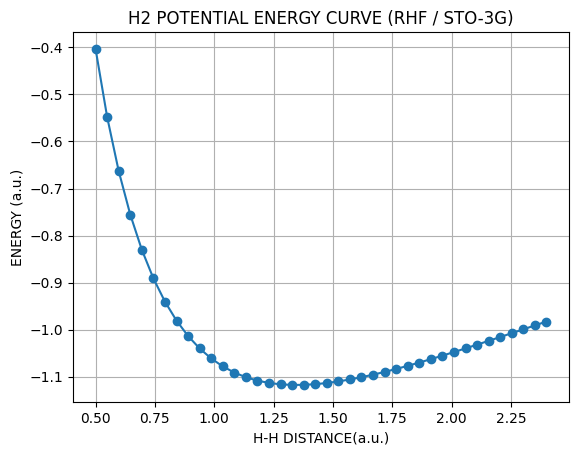

In [50]:

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
import itertools

Et_list=[]
r_list=np.linspace(0.5, 2.4, 40)
d=[0.1543289673,0.5353281423,0.4446345422]
ex=[3.425250914,0.6239137298,0.1688554040]





def scf(r_list):



        for r in r_list:
               

                # =====================================================
                # NORMALIZED PRIMITIVE GAUSSIAN OVERLAP (Szabo A.9)
                # =====================================================
                
                overlap = lambda a,b,dr : ((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))*math.exp(-a*b/(a+b)*dr**2)*((3.1415926/(a+b))**1.5)


                # ===============================
                # OVERLAP MATRIX
                # ===============================

                S = np.zeros((2,2))


                n_integ=0
                for i in range(0,2):   
                    for j in range(0,2):       
                        if i==j:
                            dr=0
                        else:
                            dr=r
                        for n in range(0,3):    
                            for m in range(0,3):   
                            
                                S[i][j] += d[m]*d[n]*overlap(ex[m],ex[n],dr)
                                n_integ=n_integ+1
                              
                S=np.array(S)
                
               

                # ===============================
                # KINETIC ENERGY (Szabo A.11)
                # ===============================
                kinetic = lambda a,b,dr : ((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))\
                                        *a*b*(3-2*a*b*(dr**2)/(a+b))/(a+b)\
                                        *((3.1415926/(a+b))**1.5)*math.exp(-a*b/(a+b)*dr**2)

                n_integ=0
                T = np.zeros((2,2))
                for i in range(0,2):  
                    for j in range(0,2):        
                        if i==j:
                            dr=0
                        else:
                            dr=r
                        for n in range(0,3):    
                            for m in range(0,3):   
                                T[i][j] += d[m]*d[n]*kinetic(ex[m],ex[n],dr)
                                n_integ=n_integ+1
                  
                T=np.array(T)
                

                # ===============================
                # GAUSSIAN PRODUCT CENTER
                # ===============================
                center = lambda a,b,ra,rb : (a*ra +b*rb)/(a+b)

                # ===============================
                # NUCLEAR ATTRACTION (Szabo A.33)
                # ===============================
                attraction = lambda a,b,ra,rb,rc : -((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))*(2*3.1415926/(a+b))*math.exp(-(a*b/(a+b))*(ra-rb)**2)\
                                                *0.5*(3.1415926/((a+b)*(center(a,b,ra,rb)-rc)**2))**0.5\
                                                *math.erf(((a+b)*(center(a,b,ra,rb)-rc)**2)**0.5)


                V_1=np.zeros((2,2))
                V_2=np.zeros((2,2))

                n_integ=0
                for i in range(0,2):    
                    for j in range(0,2):        
                        if i==0:
                            ra=0
                        else:
                            ra=r
                        if j==0:
                            rb=0
                        else:
                            rb=r
                        for n in range(0,3):    
                            for m in range(0,3):    

                                V_1[i][j] += d[m]*d[n]*attraction(ex[m],ex[n],ra,rb,0.00000000000001)
                                V_2[i][j] += d[m]*d[n]*attraction(ex[m],ex[n],ra,rb,r+.00000000000001)
                                n_integ=n_integ+1

                V_1=np.array(V_1)
                V_2=np.array(V_2)


                H=T+V_2+V_1
               

               

                # ----------------------------
                # Two-electron integral
                # ----------------------------

                twointegrals = lambda a, b, c, d, ra, rb, rc, rd : ((2*b/3.1415926)**(.75))*((2*a/3.1415926)**(.75))*((2*c/3.1415926)**(.75))*((2*d/3.1415926)**(.75))\
                        *((2*3.1415926**2.5)/((a+b)*(c+d)*(a+b+c+d)**.5))*math.exp(-((a*b/(a+b))*(ra-rb)**2) - (c*d/(c+d))*(rc-rd)**2)\
                        *.5*(3.1415926/(((a+b)*(c+d)/(a+b+c+d))*(center(a,b,ra,rb)-center(c,d,rc,rd))**2))**.5\
                        *math.erf((((a+b)*(c+d)/(a+b+c+d))*(center(a,b,ra,rb)-center(c,d,rc,rd))**2)**.5)


                two = [
                    [
                        [[0, 0], [0, 0]],
                        [[0, 0], [0, 0]]
                    ],
                    [
                        [[0, 0], [0, 0]],
                        [[0, 0], [0, 0]]
                    ]
                ]

                n_integ=0
                for k,l,p,u in itertools.product(range(0,2),range(0,2),range(0,2),range(0,2)):
                    for n,m,i,j in itertools.product(range(0,3),range(0,3),range(0,3),range(0,3)):
                        if k==0:
                            rk=0
                        else:
                            rk=r

                        if l==0:
                            rl=0
                        else:
                            rl=r

                        if p==0:
                            rp=0
                        else:
                            rp=r

                        if u==0:
                            ru=0
                        else:
                            ru=r

                        two[k][l][p][u]+= d[m]*d[n]*d[i]*d[j]\
                        *twointegrals(ex[m],ex[n],ex[i],ex[j],rk,rl,rp,ru+.00000000000001)
                        n_integ=n_integ+1
             

                two=np.array(two)

                

                import scipy

                # numpy.linalg: it's a module, it provides functions for linear algebra operations.
                eigenvalues,eigenvectors=np.linalg.eig(S)



                # Let's make a sure and orders them correctly:



                if eigenvectors[0][0] == np.matmul(S,eigenvectors[0])[0]/eigenvalues[0]:

                
                    pass
                else:
                    temp=eigenvalues[0]
                    eigenvalues[0]=eigenvalues[1]
                    eigenvalues[1]=temp
                #print("eigenvalues of matrix S after correction:",eigenvalues, "eigenvectors of matrix S:",eigenvectors)

                # s is a diagonal matrix of the eigenvalues of S
              
                s=np.diag(eigenvalues)
              

                U_dagger= np.conj(np.array([[eigenvectors[0][0],eigenvectors[0][1]],[eigenvectors[1][0],eigenvectors[1][1]]]))
                U = np.transpose(U_dagger)

            



                square_root_of_the_matrix_s=scipy.linalg.sqrtm(s)

                invers_square_root_of_the_matrix_s=square_root_of_the_matrix_s
                invers_square_root_of_the_matrix_s[0][0]= 1/(square_root_of_the_matrix_s[0][0])
                invers_square_root_of_the_matrix_s[1][1]= 1/(square_root_of_the_matrix_s[1][1])

                X = np.matmul(np.matmul(U,invers_square_root_of_the_matrix_s),U_dagger)
               
                X_dagger= np.conj(np.transpose(X))
                

                P=[[1,0],[1,0]]

                F=H

                



                

                
                
                for n in range(0,25):

                        F_prime=np.matmul(np.matmul(X_dagger,F),X)
                        eigenvalues,eigenvectors=np.linalg.eig(F_prime)
                        C_prime= np.transpose(eigenvectors)
                        C=np.matmul(X,C_prime)
                        for i,j in itertools.product(range(0,2),range(0,2)):
                            
                            P[i][j]=2*C[i][0]*np.conj(C[j][0])
                    
                        P=np.array(P)
                        G=[[0,0],[0,0]]
                        for i,j, in itertools.product(range(0,2),range(0,2)):
                            for k,l in itertools.product(range(0,2),range(0,2)):
                                G[i][j]+= ((P[k][l])*(two[i][j][l][k]-0.5*two[i][k][l][j]))
                        G=np.array(G)
                        F=H+G
                     


                    
           

                E_H=0
                E_G=0
                E_tot=0
                for i,j in itertools.product(range(0,2),range(0,2)):
                        E_H+=P[i][j]*H[j][i]
                        E_G+= 0.5*P[i][j]*G[j][i]
                    
                E_e= E_H+E_G
                
                N_repul=1/r
                E_tot= E_e+ N_repul
                
                
                Et_list.append(E_tot)
                


scf(r_list)
plt.plot(r_list, Et_list, marker="o")
plt.xlabel("H-H DISTANCE(a.u.)")
plt.ylabel("ENERGY (a.u.)")
plt.title("H2 POTENTIAL ENERGY CURVE (RHF / STO-3G)")
plt.grid()
plt.show






## Relaxation

There are some ways to do geometry optimization such as:
1: Energy scan
2: Gradient-based optimization



